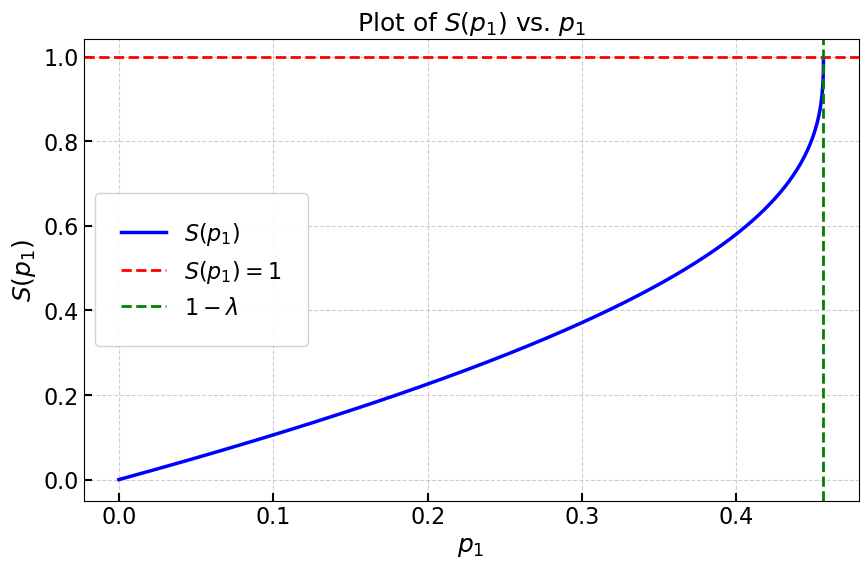

In [16]:
#(**Last Updated**: January 21, 2025)
import numpy as np
import matplotlib.pyplot as plt

# Define lambda based on equation (15) from the document
LAMBDA = (1/3) * ( (-1 - 2 / (17 + 3 * np.sqrt(33))**(1/3) + (17 + 3 * np.sqrt(33))**(1/3)) )

# Define constants
P1_MAX = 1 - LAMBDA  # Upper bound for p1
THRESHOLD = 1e-5  # Stop recursion when p_n drops below this value
STEP_SIZE = 1e-5  # Step size for p1 sampling

def compute_p_sequence(p1):
    """
    Computes the probability sequence {p_n} using the recursive equation (21) from the document:
    
    p_{n+1} = 1 - sum(p_k for k=1 to n) - sqrt((1 - sum(p_k for k=1 to n))^2 - p_n^2)
    
    Stops when p_n drops below the threshold.
    
    Args:
        p1 (float): The initial probability value p1.
    
    Returns:
        list: The computed sequence {p_n} until p_n < THRESHOLD.
    """
    p_values = [p1]
    while True:
        sum_p = sum(p_values)  # Compute sum(p_k) for k=1 to n
        pn = p_values[-1]
        
        # Compute next p_n+1 using equation (21)
        term_inside_sqrt = (1 - sum_p) ** 2 - pn ** 2
        if term_inside_sqrt < 0:  # Numerical safety check
            break
        next_p = 1 - sum_p - np.sqrt(term_inside_sqrt)
        
        # Stop if p_n+1 is below threshold
        if next_p < THRESHOLD:
            break
        
        p_values.append(next_p)
    
    return p_values

def compute_S(p1):
    """
    Computes S(p1) = sum of all computed p_n values.
    
    Args:
        p1 (float): The initial probability p1.
    
    Returns:
        float: The sum S(p1).
    """
    return sum(compute_p_sequence(p1))

def plot_S_function():
    """
    Plots S(p1) as a function of p1 over the range [0, 1 - LAMBDA] with improved visualization.
    Includes a vertical dashed line at 1 - LAMBDA.
    """
    p1_values = np.arange(0, P1_MAX, STEP_SIZE)
    S_values = [compute_S(p1) for p1 in p1_values]

    # Creazione del plot
    plt.figure(figsize=(10, 6))  # Dimensione maggiore per una migliore visibilità
    plt.plot(p1_values, S_values, label=r"$S(p_1)$", color="blue", linewidth=2.5)  # Linea più spessa
    plt.axhline(y=1, color="red", linestyle="--", linewidth=2, label=r"$S(p_1) = 1$")  # Linea orizzontale tratteggiata
    plt.axvline(x=P1_MAX, color="green", linestyle="--", linewidth=2, label=r"$1 - \lambda$")  # Linea verticale tratteggiata in x = 1 - λ

    # Titoli e label con font più grande, ma senza bold
    plt.xlabel(r"$p_1$", fontsize=18)
    plt.ylabel(r"$S(p_1)$", fontsize=18)
    plt.title(r"Plot of $S(p_1)$ vs. $p_1$", fontsize=18)

    # Personalizzazione degli assi e dei tick
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Aggiunta della griglia
    plt.grid(True, linestyle='--', linewidth=0.8, alpha=0.6)

    # Legenda ingrandita con riquadro più grande
    plt.legend(fontsize=16, loc="best", frameon=True, framealpha=0.9, fancybox=True, borderpad=1.2)
    plt.tick_params(axis="both", direction="in", length=6, width=1.5)
    
    # Mostra il plot
    plt.show()

plot_S_function()
